<a href="https://colab.research.google.com/github/georgeragan/BIG_MART/blob/main/BIG_MART_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMOPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


**LOADING THE DATASETS**

In [ ]:
train_data=pd.read_csv("/content/train_v9rqX0R.csv")
test_data=pd.read_csv("/content/test_AbJTz2l.csv")

In [ ]:
train_data['Source'] = 'train'
test_data['Source'] = 'test'
data = pd.concat([train_data, test_data], axis=0)

**GETTING FIRST 5 ROWS**

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


**CHECKING SHAPE DATATYPES AND NULL VALUES**

In [ ]:
data.shape

(14204, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


**IMPUTING BY MEAN AND MODE**

In [ ]:
data["Item_Weight"]=data["Item_Weight"].fillna(value=data["Item_Weight"].mean())

In [ ]:
mode_of_outlet_size=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [ ]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values=data["Outlet_Size"].isnull()

In [ ]:
missing_values[0:5]

,Outlet_Size
0,False
1,False
2,False
3,True
4,False


In [ ]:
data.loc[missing_values,"Outlet_Size"]=data.loc[missing_values,"Outlet_Type"].apply(lambda x:mode_of_outlet_size[x])

In [ ]:
data["Outlet_Size"].value_counts()

,count
Outlet_Size,
Small,7996
Medium,4655
High,1553


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**VISUALISATION OF DATASET**

<ipython-input-59-639dd9e20acf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Weight"])


<Axes: xlabel='Item_Weight', ylabel='Density'>

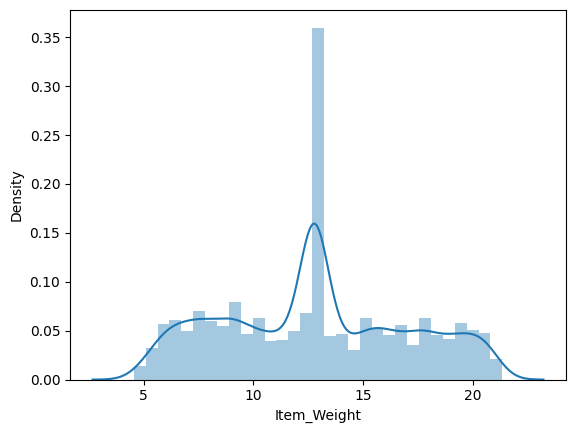

In [ ]:
sns.distplot(data["Item_Weight"])


<ipython-input-60-c42a6603a5cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Visibility"])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

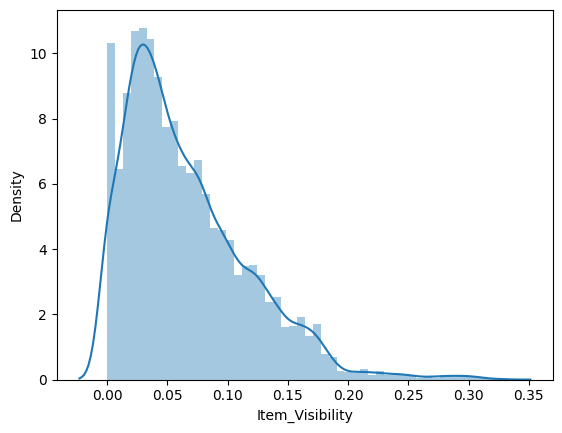

In [ ]:
sns.distplot(data["Item_Visibility"])

<ipython-input-61-52739f465358>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_MRP"])


<Axes: xlabel='Item_MRP', ylabel='Density'>

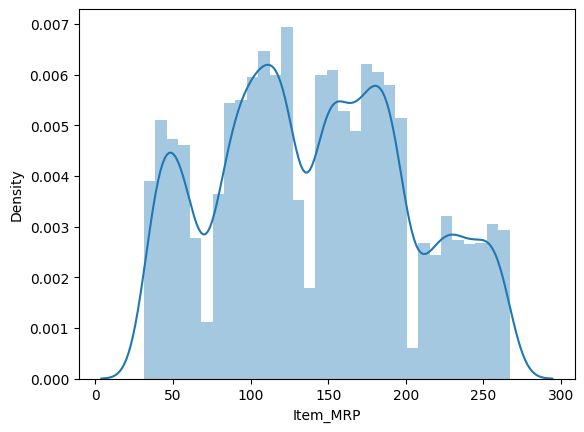

In [ ]:
sns.distplot(data["Item_MRP"])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

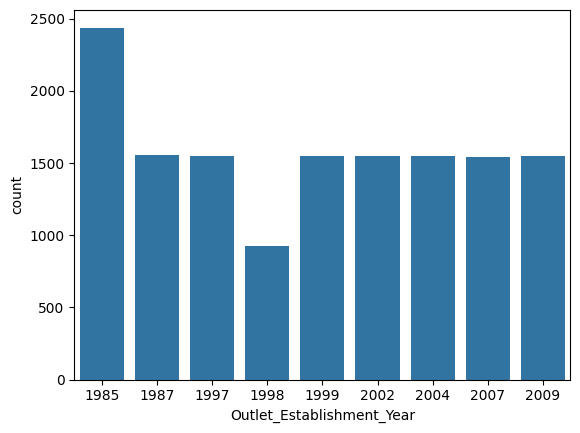

In [ ]:
sns.countplot(x=data["Outlet_Establishment_Year"],data=data)

<ipython-input-63-ddd0d32dd610>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Item_Outlet_Sales"])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

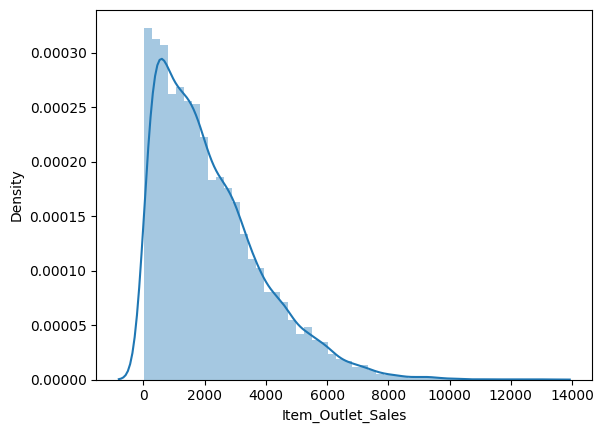

In [ ]:
sns.distplot(data["Item_Outlet_Sales"])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

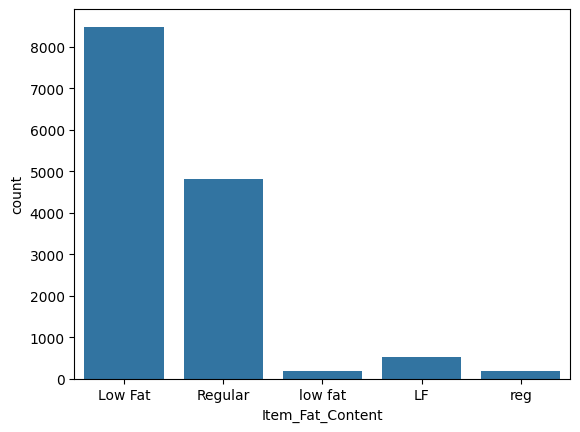

In [ ]:
sns.countplot(x=data["Item_Fat_Content"],data=data)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


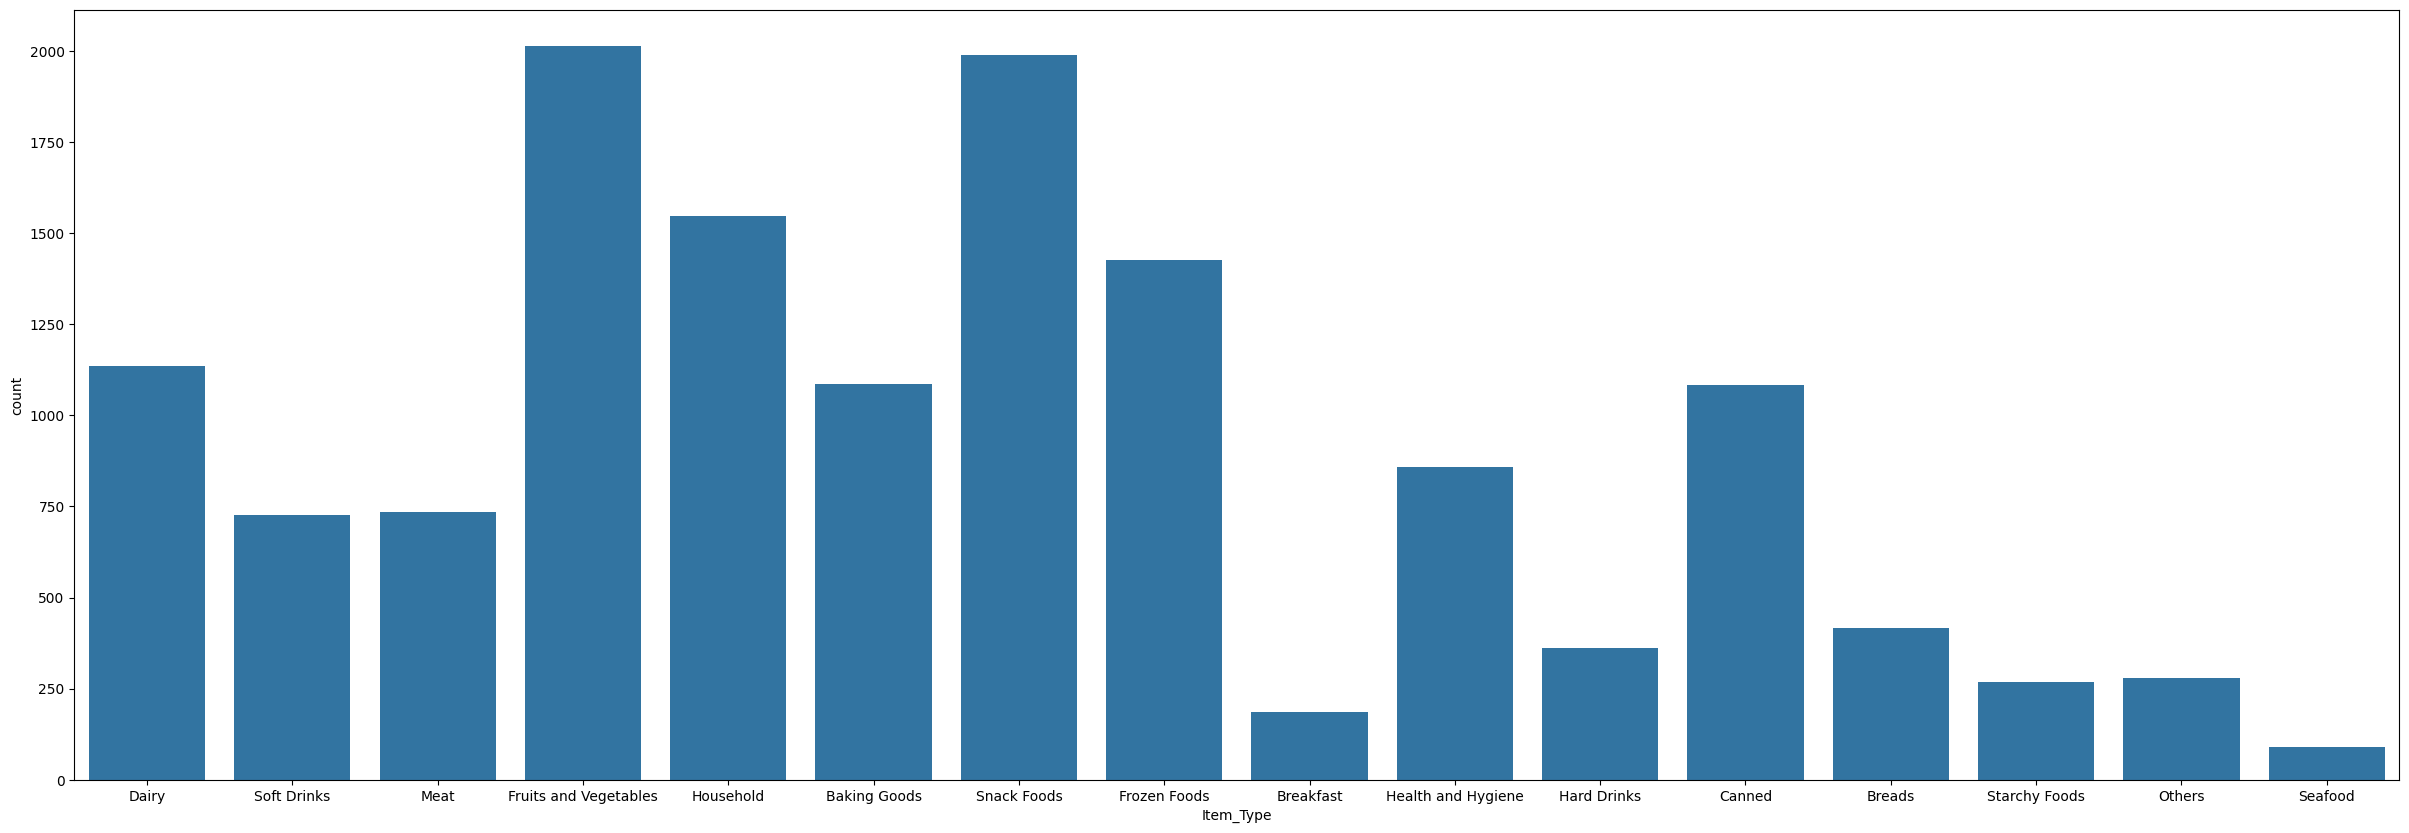

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x=data["Item_Type"],data=data)
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='count'>

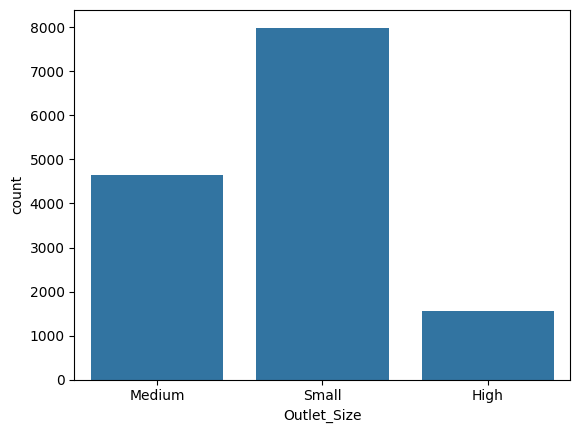

In [ ]:

sns.countplot(x="Outlet_Size",data=data)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


**CONVERTING CATOGORICAL TO NUMERICAL**

In [ ]:
lb=LabelEncoder()
data["Item_Fat_Content"]=lb.fit_transform(data["Item_Fat_Content"])
data["Item_Identifier"]=lb.fit_transform(data["Item_Identifier"])
data["Item_Type"]=lb.fit_transform(data["Item_Type"])
data["Outlet_Identifier"]=lb.fit_transform(data["Outlet_Identifier"])
data["Outlet_Location_Type"]=lb.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=lb.fit_transform(data["Outlet_Type"])
data["Outlet_Size"]=lb.fit_transform(data["Outlet_Size"])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train


**SPLITTING BACK TO TEST AND TRAIN**

In [ ]:
train_data = data[data['Source'] == 'train'].drop(['Source'], axis=1)
test_data = data[data['Source'] == 'test'].drop(['Source', 'Item_Outlet_Sales'], axis=1)

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1078,8.300000,4,0.038428,4,87.3198,2,2007,2,1,1
2,1420,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,817,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1197,12.792854,2,0.118599,4,234.2300,5,1985,1,2,3


**SPLITIING TO X AND Y AND DIVIDING TO TRAIN AND VALIDATION**

In [ ]:
X = train_data.drop(['Item_Outlet_Sales'], axis=1)
y = train_data['Item_Outlet_Sales']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**BUILDING MODEL**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**FINDING THE ERROR**

In [ ]:
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 1098.7323633178617


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**PREDICTING FOR TEST DATA**

In [ ]:
X_test = test_data
test_data['Item_Outlet_Sales'] = model.predict(X_test)

**SAVING THE FILE**

In [ ]:
submission = test_data[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
submission.to_csv('submission.csv', index=False)